<a href="https://colab.research.google.com/github/Laura9704/2025_-Analisis/blob/main/ANALISIS_UNIVARIADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sns.set_theme(style="whitegrid")

Mounted at /content/drive


In [ ]:
#llamado de la informacion
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')

**INTRODUCCION**

El presente trabajo se enfoca en detallar los pasos del analisis univariado a la informacion de la base del 2021 BRFSS Dataset from CDC;es el Sistema de Vigilancia de Factores de Riesgo Conductual (BRFSS) el cual es el principal sistema de encuestas telefónicas relacionadas con la salud donde se recopila datos estatales sobre los residentes de EE. UU en base a estilos de vida y salud, esta base consta con 19 caracteristicas para analisis de las cuales 7 son numericas y 12 son categoricas.Por ello este análisis univariado, se busca explorar y comprender las características fundamentales del conjunto de datos, como es la distribución, la tendencia central, y los posibles patrones presentes en los datos antes de realizar análisis más complejos.




**SELECCIÓN DE LA VARIABLE**

Para la seleccion de la variable se prosiguen los siguientes pasos de analisis en los datos de la base llamada CVD_cleaned.csv, la cual consiste en reconocimiento del tamano de la informacion la cual consta de 19 columnas o etiquetas con 308854 registros, de los cuales hay informacion categorica y numerica.

 a continuacion se anexa la informacion de las datos en la base

In [ ]:
print("Información del conjunto de datos:\n")
data.info()

Información del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(

**Estadísticas descriptivas:** Como se conoce hay dos tipos de varibles dentro de los datos, por lo cual se analisa las tendencias de estos a continuacion

En la primera tabla es para variables numericas nos indica por sus medias que existe un individuo tiene un promedio de altura de 170.6, un peso de 83.6, y un IMC de 25.6 que indica sobrepeso en base de las reglas del IMC/BMI que debe mayores iguales tiene tendencia a sobrepeso,con comsumos de frutas y vegetales alto, con bajo consumo de alcohol y papas fritas.

En cuestion de la STD o desviacion estandar hay una gran dispersion dentro de la mayoria de los datos, siendo el BMI/IMC es mas moderada y los cambios no son grandes, por lo cual los datos tienen a tener el mismo comportamiento que seria el sobrepeso en base a la media.

In [ ]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


en las variables categoricas nos indica que la mayoria de los individuos tiene una buena salud y que realizan un ejercio(algun deporte), que rondan las edades de los 65 a 69 años, la mayoria no fuman y son mujeres.

In [ ]:
data.describe(include="object")

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590



*   **Variables Categoricas**:son aquellas que toman un número limitado de categorías o grupos. Estas variables no tienen un orden o un valor numérico específico, en la informacion del dataset se encuentran las variables:

*  **General_Health**:  Esta variable representa la percepción de la salud general de los encuestados en el BRFSS. Su distribución está desbalanceada, ya que una de las opciones (buena salud) tiene una mayor representación con un 35.8%, mientras que la opción de salud pobre/mala representa solo el 3.7% de los registros. En cuanto a la posibilidad de sesgo, este se enfocaría en la determinación de salud pobre.
     
  **pregunta asociada:**  ¿Diría usted que en general su salud es...?

   **Excellent:** e registraron 55,954 personas con una excelente salud general, esta representa el  **18.1%**  de los datos.

   **Very Good**  Con 110395 registros de tener una muy buena salud general, representa el **35.8%**.

   **Good** Con 95364 personas tienen una salud buena, con el **30.9%**

   **Fair** Con 35810  regristros para normal(regular) de salud, con el valor del **11.6%**.

   **Poor:** Con 11331 de tener una salud pobre, con el **3.7%**.
   
 Esta variable tiene una representatividad limitada en el análisis del riesgo de enfermedades cardíacas. Su carácter demasiado general dentro del contexto analizado no proporciona información específica ni relevante sobre los factores de riesgo cardiovasculares que deben considerarse para evaluar adecuadamente el riesgo de enfermedad cardíaca.

 Sin embargo, puede ser una variable de alerta dentro del análisis, ya que una percepción negativa de la salud general podría indicar la presencia de alguna enfermedad en desarrollo.


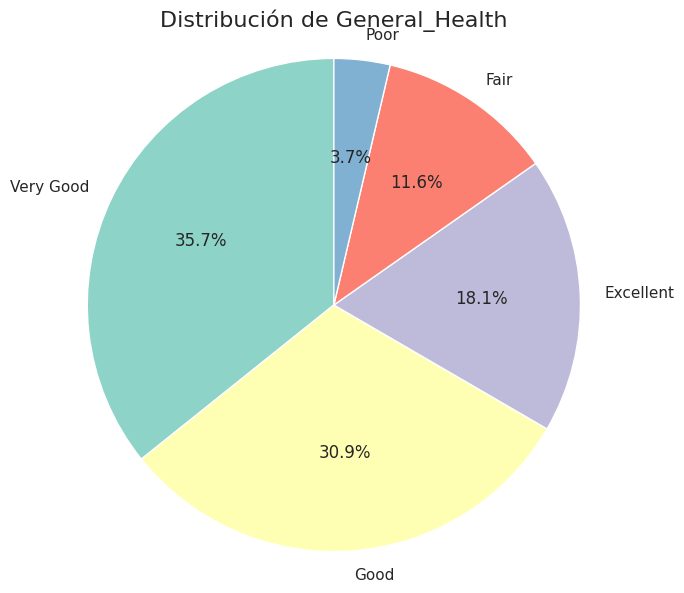

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['General_Health'].value_counts(), labels=data['General_Health'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['General_Health'].value_counts())))
plt.title("Distribución de General_Health", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

* **Checkup**:    Esta característica representa la frecuencia con la que una persona se somete a un chequeo o revisión médica. En la base de datos, las respuestas están distribuidas de la siguiente manera:

 **Within the past year:** 239,371 registros de una revisión dentro del último año, lo que representa un **77.5%.** Este es un índice alto dentro de los datos obtenidos y muestra un desequilibrio en la distribución de los datos para esta característica.

 **Within the past 2 years:** 37,213 registros para chequeos dentro de los últimos dos años, lo que representa un **12.1%** de los datos, siendo una representación algo significativa para la clasificación.

 **Within the past 5 years:** 17,442 registros de visitas de chequeo al médico dentro de los últimos cinco años, lo que representa un **5.7%.** Esto sugiere que una parte de los encuestados no considera realizar revisiones de salud periódicas.

 **5 or more years ago:** 13,421 encuestados que realizaron un chequeo médico hace más de cinco años, representando el **4.3%** de los datos.

 **Never:** 1,407 encuestados que nunca han realizado un chequeo médico, lo que representa el **0.5%.**

Al igual que la variable de Salud General, esta variable no representaría una gran relevancia en el análisis del riesgo de enfermedades cardíacas, ya que se enfoca en la frecuencia con la que se realiza un chequeo médico, como lo indica la pregunta de sondeo:1111
"¿Aproximadamente cuánto tiempo ha pasado desde la última vez que visitó a un médico para un chequeo de rutina?"

Aunque esta pregunta puede proporcionar información útil sobre la posibilidad de un diagnóstico temprano y un adecuado control de enfermedades, no se enfoca específicamente en los factores de riesgo cardíaco.

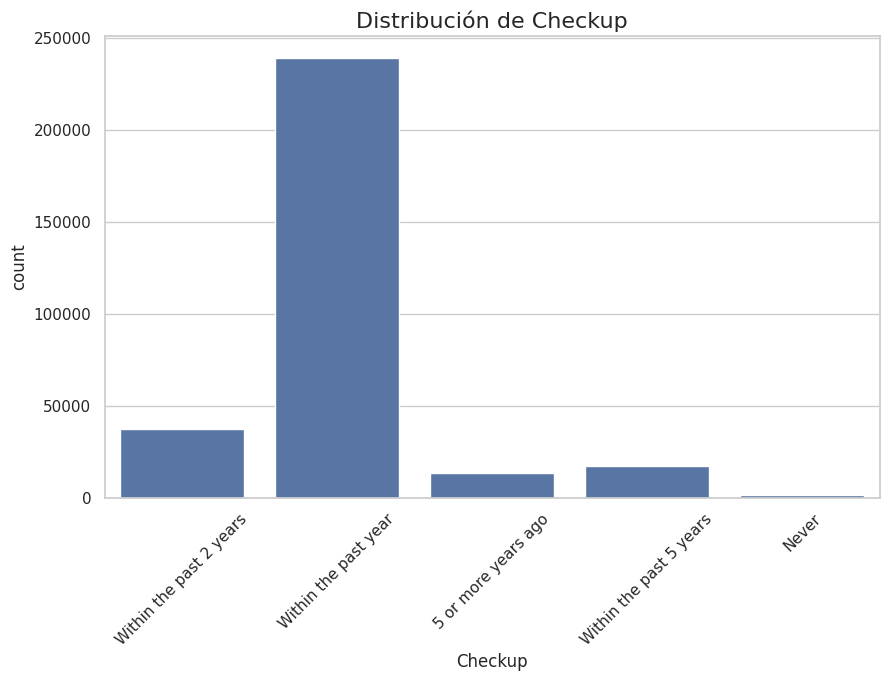

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Checkup',data=data)
plt.title('Distribución de Checkup', fontsize=16)
plt.xticks(rotation=45)
plt.show()


*   **Age_Category**: Esta variable es categórica, ya que representa rangos de edad en lugar de valores numéricos continuos. Cada categoría agrupa a las personas dentro de un determinado intervalo de edades:

  **RANGO**   **CANT** | **RANGO**   **CANT**

  **18-24**  18,681   | **25-29**  15,494

  **30-34**	  18,428   | **35-39** 	20,606

  **35-39**  20,606   | **40-44**	  21,595
  
  **45-49**  	20,968  | **50-54**   	25,097
  
  **55-59** 28,054 |  **60-64**	  32,418

  **65-69**	33,434 | **70-74**	31,103

  **75-79**	20,705 | **80+**	22,271


Esta variable es esencialmente representativa, ya que con el paso de los años las probabilidades de desarrollar enfermedades crónicas (como enfermedades cardíacas o neurodegenerativas) tienden a aumentar debido a los cambios biológicos y fisiológicos que ocurren con el envejecimiento.

No obstante, es importante recordar que factores genéticos y anomalías congénitas pueden hacer que personas jóvenes también desarrollen enfermedades cardiovasculares. Debido a su impacto en la salud, esta variable es clave en un modelo de predicción de riesgo cardíaco.

Por otro lado, al analizar la distribución de los datos, se observa que la información está bien equilibrada, sin una desproporción extrema entre los diferentes rangos de edad. Esto sugiere que la distribución es relativamente homogénea, lo que podría facilitar un análisis más preciso sin sesgos significativos.





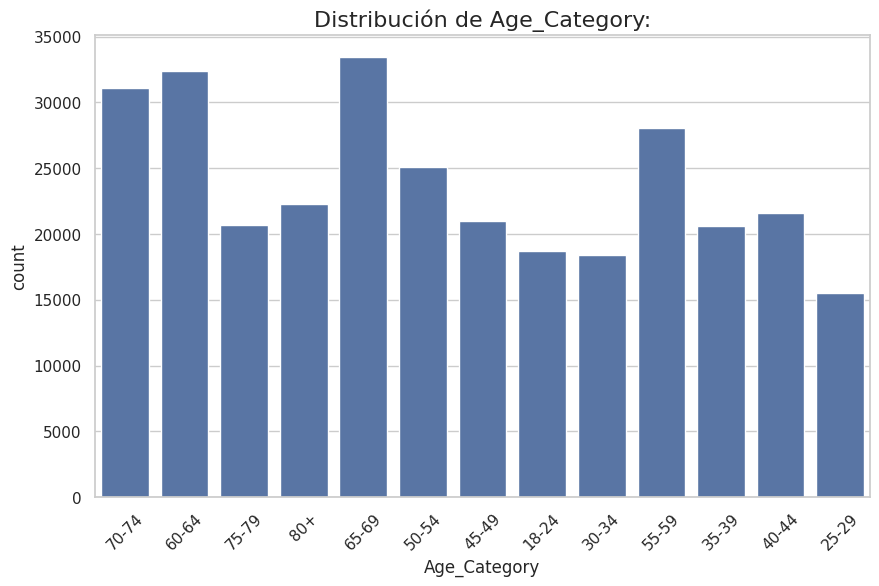

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category',data=data)
plt.title('Distribución de Age_Category:', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Las siguientes variables son binarias, con dos opciones posibles: "YES" o "NO", o bien "FEMALE" o "MALE". En algunos casos, una de las opciones incluye observaciones adicionales que explican el motivo de la elección. Además, en esta sección se presentan las variables que se consideran en la modelización.

**Exercise** El ejercicio es un factor clave en la prevención de diversas enfermedades, como obesidad, enfermedades cardíacas, diabetes, artritis y depresión, por lo que esta variable es relevante para el análisis.

al ser una respuesta es binaria ("YES" o "NO"), la variable puede generar un sesgo en la distribución y/o predicion dentro de un modelo, ya que existe un desequilibrio en las respuestas como se observa en la grafica,lo que llevaría a subestimar o no capturar correctamente los patrones de las personas que no realizan actividad física.


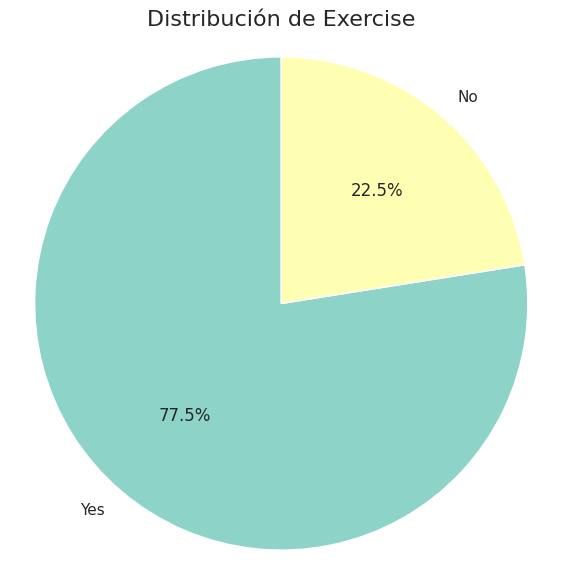

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Exercise'].value_counts(), labels=data['Exercise'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Exercise'].value_counts())))
plt.title("Distribución de Exercise", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


*   **Heart_Disease**: Esta variable representa a los encuestados que informaron tener enfermedad cardíaca coronaria o haber sufrido un infarto de miocardio. Dado que estas afecciones están directamente relacionadas con el riesgo cardiovascular, esta variable será fundamental en el análisis.
Sin embargo, al analizar su distribución, se observa un desequilibrio significativo, con una mayor proporción de personas que no presentan enfermedad cardíaca o no han sufrido un infarto. Esto podría generar sesgo en el modelo, afectando la capacidad de predicción y el análisis de riesgos.







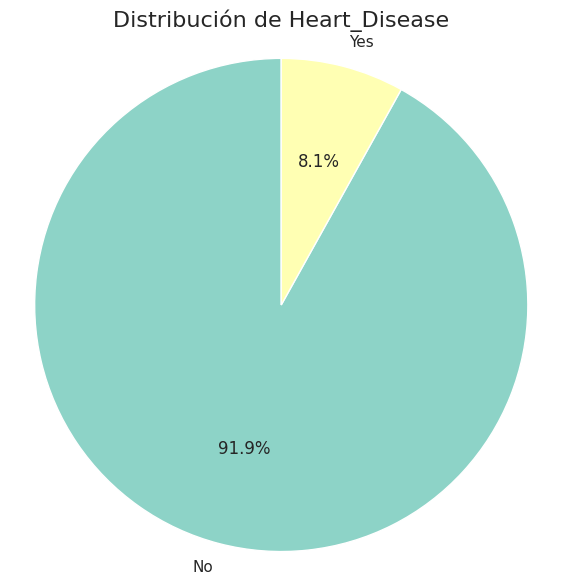

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Heart_Disease'].value_counts(), labels=data['Heart_Disease'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Heart_Disease'].value_counts())))
plt.title("Distribución de Heart_Disease", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

* **Diabetes**: La diabetes es una enfermedad crónica caracterizada por niveles elevados de glucosa en la sangre, lo que puede dañar el corazón y aumentar el riesgo de sufrir un infarto de miocardio o insuficiencia cardíaca. Debido a su impacto en la salud cardiovascular, esta variable se considera relevante para el análisis del riesgo cardíaco.
En cuanto a la distribución de los datos, se observa un desequilibrio, con una mayor proporción de personas que no tienen diabetes. Esto podría generar sesgo en el análisis. Además, es importante considerar si se deben excluir los registros que indican pre-diabetes o diabetes gestacional, ya que podrían influir en la interpretación de los resultados.



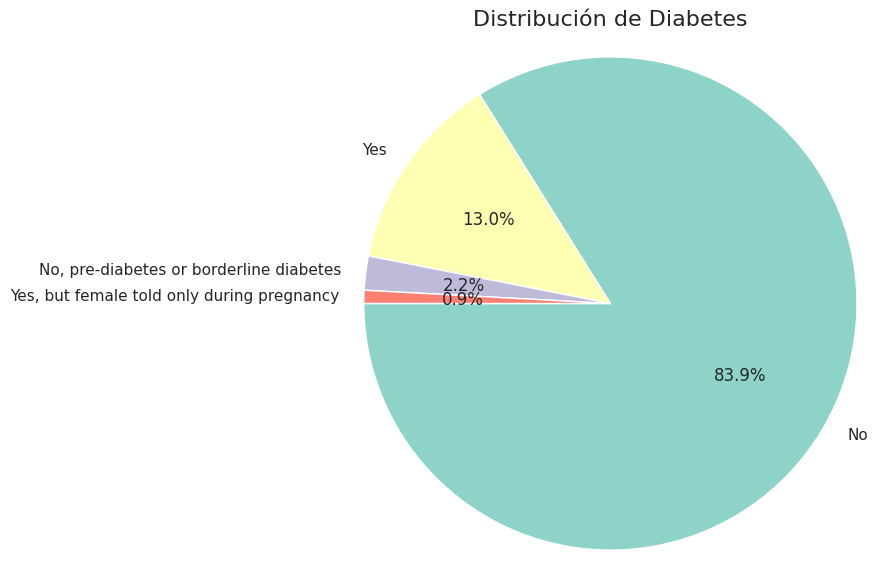

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Diabetes'].value_counts(), labels=data['Diabetes'].value_counts().index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette("Set3", len(data['Diabetes'].value_counts())))
plt.title("Distribución de Diabetes", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

*  **Smoking_History**: Esta variable indica si una persona tiene un historial de tabaquismo, lo que resulta relevante para estimar el riesgo de diversas complicaciones de salud, incluyendo enfermedades respiratorias, cardiovasculares y otras afecciones crónicas.
Dado que el tabaquismo es un factor de riesgo reconocido para las enfermedades cardíacas, esta variable podría influir significativamente en el análisis del riesgo cardiovascular.
En cuanto a la distribución de los datos, se observa una diferencia porcentual del 9.8% entre las categorías, lo que sugiere cierta homogeneidad en la muestra.



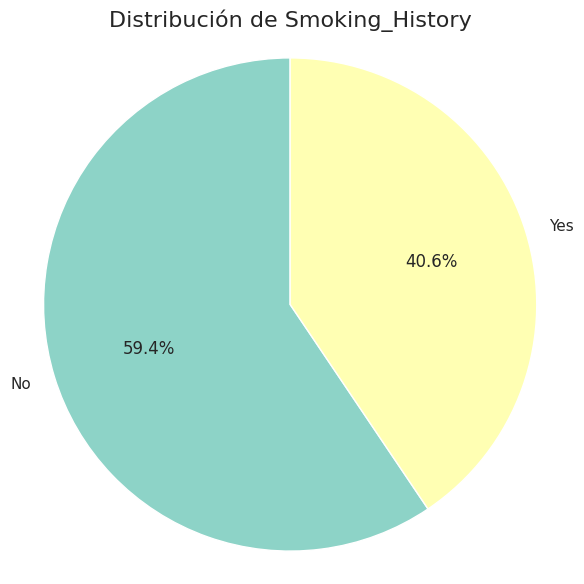

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Smoking_History'].value_counts(), labels=data['Smoking_History'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Smoking_History'].value_counts())))
plt.title("Distribución de Smoking_History", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


*  **Sex**  Esta variable representa el género de la persona, identificando si es hombre o mujer. Se considera una variable relevante en el análisis de enfermedades cardíacas, ya que el riesgo puede variar según el sexo y la edad.
En el caso de las mujeres, factores hormonales como el embarazo y la menopausia pueden aumentar la probabilidad de desarrollar enfermedades cardiovasculares. Por otro lado, los hombres también presentan diferencias en la prevalencia y gravedad de estas enfermedades debido a factores hormonales y metabólicos.
En cuanto a la distribución de los datos, se observa una relativa homogeneidad, con una proporción aproximadamente equilibrada entre ambos géneros (cercana al 50/50).

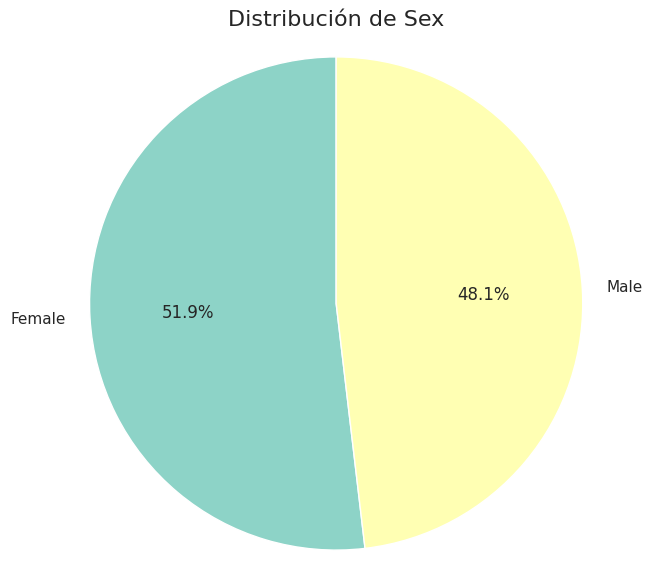

In [ ]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Sex'].value_counts(), labels=data['Sex'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Sex'].value_counts())))
plt.title("Distribución de Sex", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

Estas variables reflejan si el individuo encuestado reportó haber sido diagnosticado con cáncer, ya sea de piel o de otro tipo. Sin embargo, en una de ellas no se especifica el tipo de cáncer, lo que podría limitar su utilidad en el análisis. Dado este contexto, es posible que estas variables no sean relevantes en etapas posteriores del estudio. Lo mismo podría aplicarse a las variables de artritis y depresión, dependiendo del enfoque del análisis.


**Skin Cancer (Cáncer de Piel)**
En la base de datos, el 90% de los encuestados (278,860 personas) reportaron no haber tenido cáncer de piel, mientras que solo el 10% (29,994 personas) respondieron afirmativamente. Esta variable presenta un alto desequilibrio en su distribución, lo que podría sesgar cualquier modelo predictivo hacia la categoría "No tiene cáncer de piel".

**Other Cancer (Otros Tipos de Cáncer)**
La distribución en esta variable es similar a la anterior: 90% (278,976 registros) corresponden a la respuesta "No", y el 10% (29,878 registros) corresponden a la respuesta "Sí". Al igual que con Skin Cancer, este desequilibrio podría afectar la precisión de modelos predictivos, inclinándolos a clasificar la mayoría de los casos como "No tiene cáncer".

**Arthritis (Artritis)**
La artritis es una enfermedad que provoca inflamación y degeneración de las articulaciones. Sin embargo, en el contexto del estudio, es poco probable que tenga una influencia directa en la evaluación de riesgos cardiovasculares. En términos de distribución: 67% (207,783 personas) respondieron "No". y el 33% (101,071 personas) respondieron "Sí". Aunque la diferencia entre ambas categorías no es tan marcada como en las variables de cáncer, sigue habiendo un sesgo hacia la clase "No", lo que podría afectar su impacto en el análisis.

**Depression (Depresión)**
La depresión es una enfermedad mental caracterizada por un estado de ánimo triste y persistente que interfiere con la vida diaria. En la base de datos: el 80% (246,953 personas) respondieron "No". y el 20% (61,901 personas) respondieron "Sí". Esta variable también presenta un sesgo marcado hacia la categoría "No tiene depresión", lo que debe considerarse al interpretar los resultados.

**Frecuencias**

In [ ]:
cat_columns = ['Skin_Cancer', 'Other_Cancer', 'Arthritis', 'Depression']
for col in cat_columns:
    print(f"\nFrecuencia de {col}:")
    print(data[col].value_counts(normalize=True) * 100)


Frecuencia de Skin_Cancer:
Skin_Cancer
No     90.288615
Yes     9.711385
Name: proportion, dtype: float64

Frecuencia de Other_Cancer:
Other_Cancer
No     90.326174
Yes     9.673826
Name: proportion, dtype: float64

Frecuencia de Arthritis:
Arthritis
No     67.275476
Yes    32.724524
Name: proportion, dtype: float64

Frecuencia de Depression:
Depression
No     79.957844
Yes    20.042156
Name: proportion, dtype: float64


*   **Variables numericas**:Son aquellas que toman valores numéricos y pueden ser medidas o cuantificadas. como son las variables.

las  tres primeras etiquetas estan relacionadas ya que son medidas antropométricas, están directamente relacionados, ya que el IMC/BMI se calcula dividiendo el peso por el cuadrado de la altura

* **Altura (Height cm)**
La altura es la medida de la longitud total del cuerpo desde la cabeza hasta los pies en posición vertical. Algunos estudios sugieren que esta medida puede estar relacionada con el riesgo cardiovascular, debido a cómo el corazón debe adaptarse a una mayor altura, aunque esta relación no siempre es concluyente.

* **Peso (Weight kg)**
El peso es una medida que evalúa la masa corporal de un individuo. Un aumento significativo en el peso puede estar asociado con un mayor riesgo de enfermedades cardíacas, diabetes y otros problemas de salud.

* **BMI (Índice de Masa Corporal)**
El BMI (siglas en inglés de "Body Mass Index") es un indicador ampliamente utilizado para clasificar el estado nutricional de una persona. Permite evaluar si una persona se encuentra en un rango saludable, bajo peso, sobrepeso o en alguna categoría de obesidad.

Las siguientes variables no especifican claramente sus unidades de medida, por lo que es importante revisar la metodología utilizada en el cuestionario aplicado para determinar si se midieron en días por semana, días en los últimos 30 días u otra unidad de tiempo.

- **Alcohol Consumption**
Representa el consumo de alcohol de una persona. Con base en la gráfica, se interpretará en función de los días en los últimos 30 días, aunque sería ideal contar con la fuente exacta del cuestionario para confirmar esta clasificación.

- **Consumo de Alimentos**
Estas variables reflejan el comportamiento de los encuestados respecto a su alimentación, incluyendo el consumo de frutas, vegetales y papas fritas. Según la información disponible, los valores fueron calculados a partir de respuestas semanales o diarias y convertidos a valores mensuales.

Por ejemplo, una respuesta de 128 en Green_Vegetables_Consumption representaría a una persona que consume verduras al menos 4 o 5 veces al día.

- Fruit Consumption: Representa el consumo de frutas.
- Green Vegetables Consumption: Indica el consumo de vegetales verdes.
- Fried Potato Consumption: Refleja la cantidad de papas fritas consumidas.

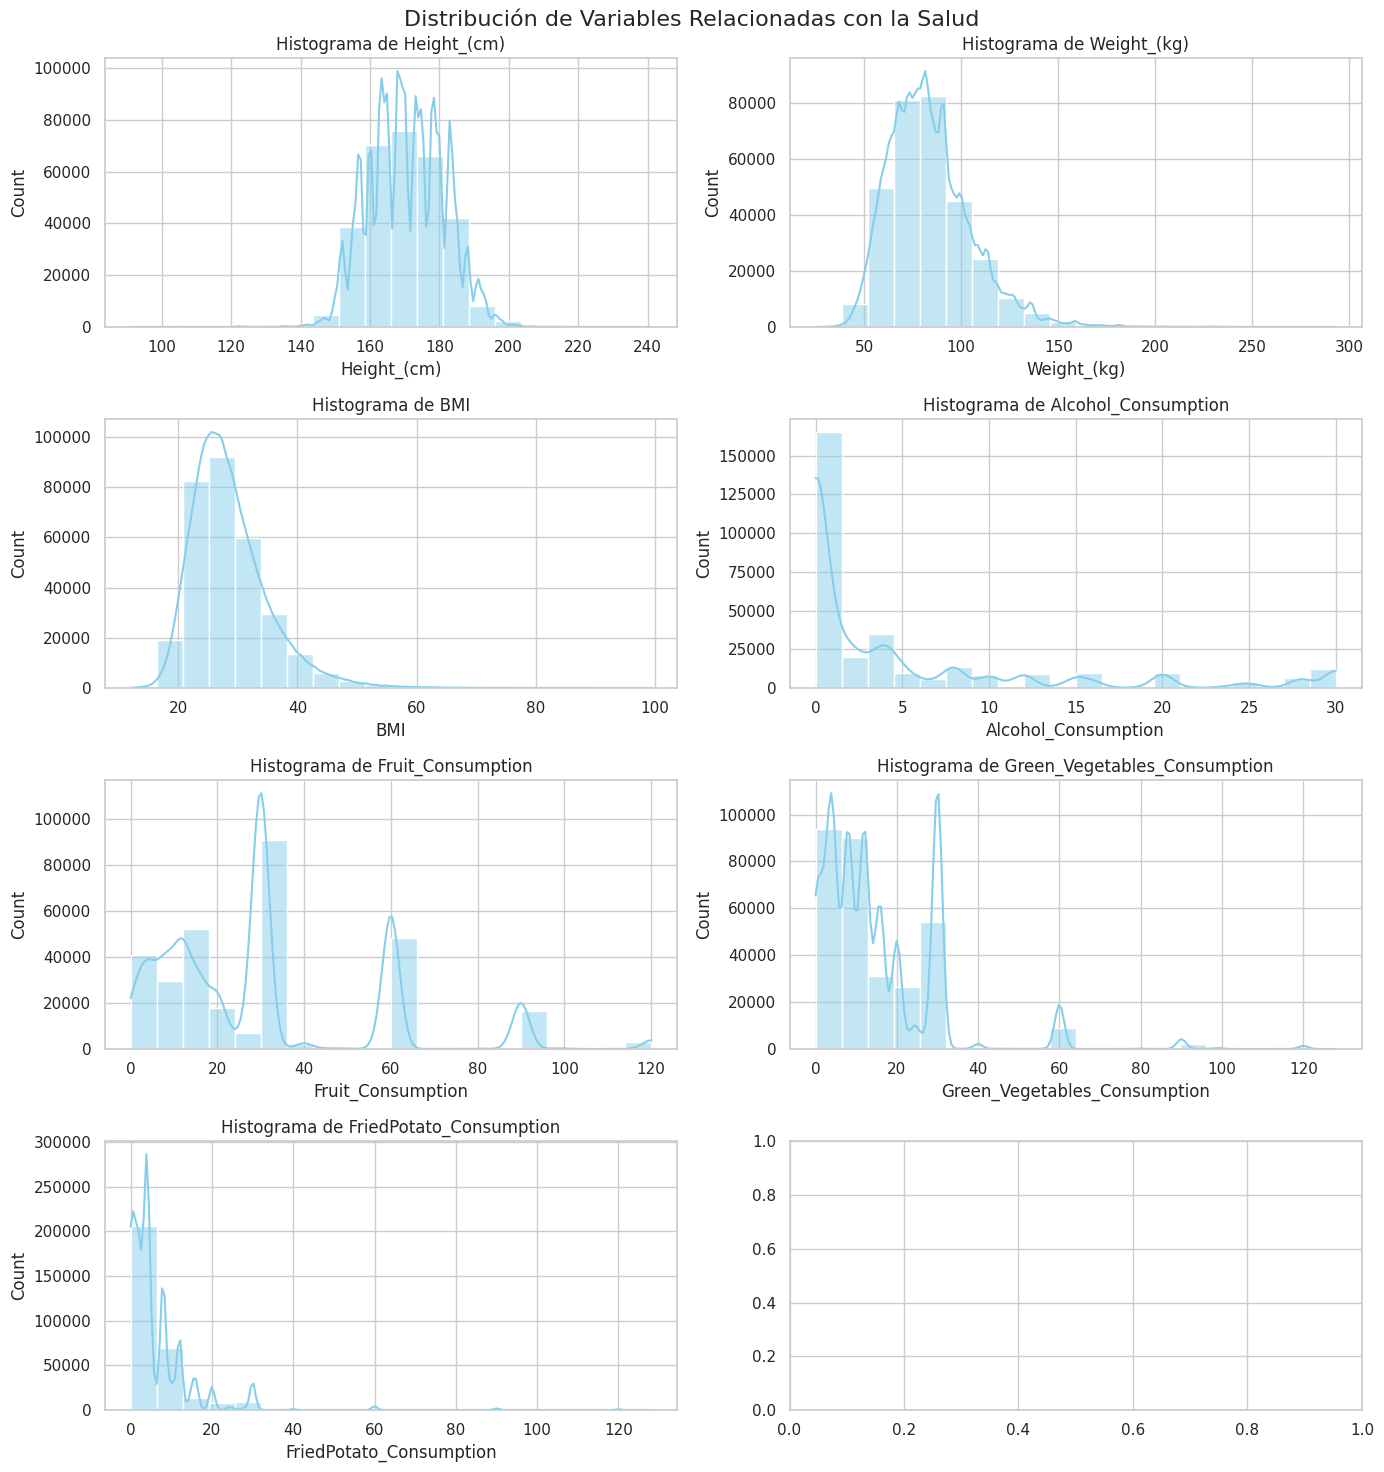

In [ ]:
#grafico
fig, axes = plt.subplots(4, 2, figsize=(14, 15))  # 2 filas, 2 columnas
fig.suptitle("Distribución de Variables Relacionadas con la Salud", fontsize=16)
sns.histplot(data['Height_(cm)'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Histograma de Height_(cm)')
sns.histplot(data['Weight_(kg)'], bins=20, kde=True, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title('Histograma de Weight_(kg)')
sns.histplot(data['BMI'], bins=20, kde=True, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title('Histograma de BMI')
sns.histplot(data['Alcohol_Consumption'], bins=20, kde=True, ax=axes[1, 1], color="skyblue")
axes[1, 1].set_title('Histograma de Alcohol_Consumption')
sns.histplot(data['Fruit_Consumption'], bins=20, kde=True, ax=axes[2, 0], color="skyblue")
axes[2, 0].set_title('Histograma de Fruit_Consumption')
sns.histplot(data['Green_Vegetables_Consumption'], bins=20, kde=True, ax=axes[2, 1], color="skyblue")
axes[2, 1].set_title('Histograma de Green_Vegetables_Consumption')
sns.histplot(data['FriedPotato_Consumption'], bins=20, kde=True, ax=axes[3, 0], color="skyblue")
axes[3, 0].set_title('Histograma de FriedPotato_Consumption')
plt.tight_layout()
plt.show()


**Datos atipicos**
A partir de los gráficos, se observa que las variables numéricas presentan varios datos atípicos (outliers), principalmente en el extremo derecho. Esto indica la presencia de individuos con valores significativamente altos en ciertas mediciones. Sin embargo, en el caso de la altura, los outliers están presentes en ambos extremos, lo que sugiere la existencia de personas con estaturas tanto muy bajas como muy altas.

**Variables Físicas:**
  
**Altura (Height cm)**:La distribución de la altura muestra la presencia de valores atípicos en ambos extremos, lo que refleja la existencia de individuos con estaturas significativamente diferentes del promedio. Aunque la caja del boxplot parece relativamente equilibrada, hay una mayor cantidad de valores atípicos en el extremo inferior, lo que sugiere que existen más personas con estaturas bajas que con estaturas extremadamente altas.

**Peso (Weight kg)**: Los datos muestran un número significativo de outliers en el extremo superior, lo que indica la presencia de individuos con pesos considerablemente elevados. La distribución dentro de la caja no es completamente simétrica, ya que Q1 está más cerca de la mediana que Q3, sugiriendo un sesgo hacia la derecha. Aunque hay una concentración notable de valores en el rango de 70 a 100 kg, el peso presenta una mayor dispersión y valores extremos que superan ampliamente los 100 kg.


**BMI (Índice de Masa Corporal)**

El BMI presenta una distribución sesgada hacia la derecha, con una gran cantidad de valores atípicos en el extremo superior, lo que indica que hay personas con un índice de masa corporal considerablemente alto. En este caso, Q3 se encuentra más alejado de la mediana que Q1, lo que confirma la asimetría de la distribución. Además, se observa que los valores están concentrados en un rango cercano a los 28 BMI, lo que sugiere que una parte considerable de la muestra se encuentra en la categoría de sobrepeso u obesidad.


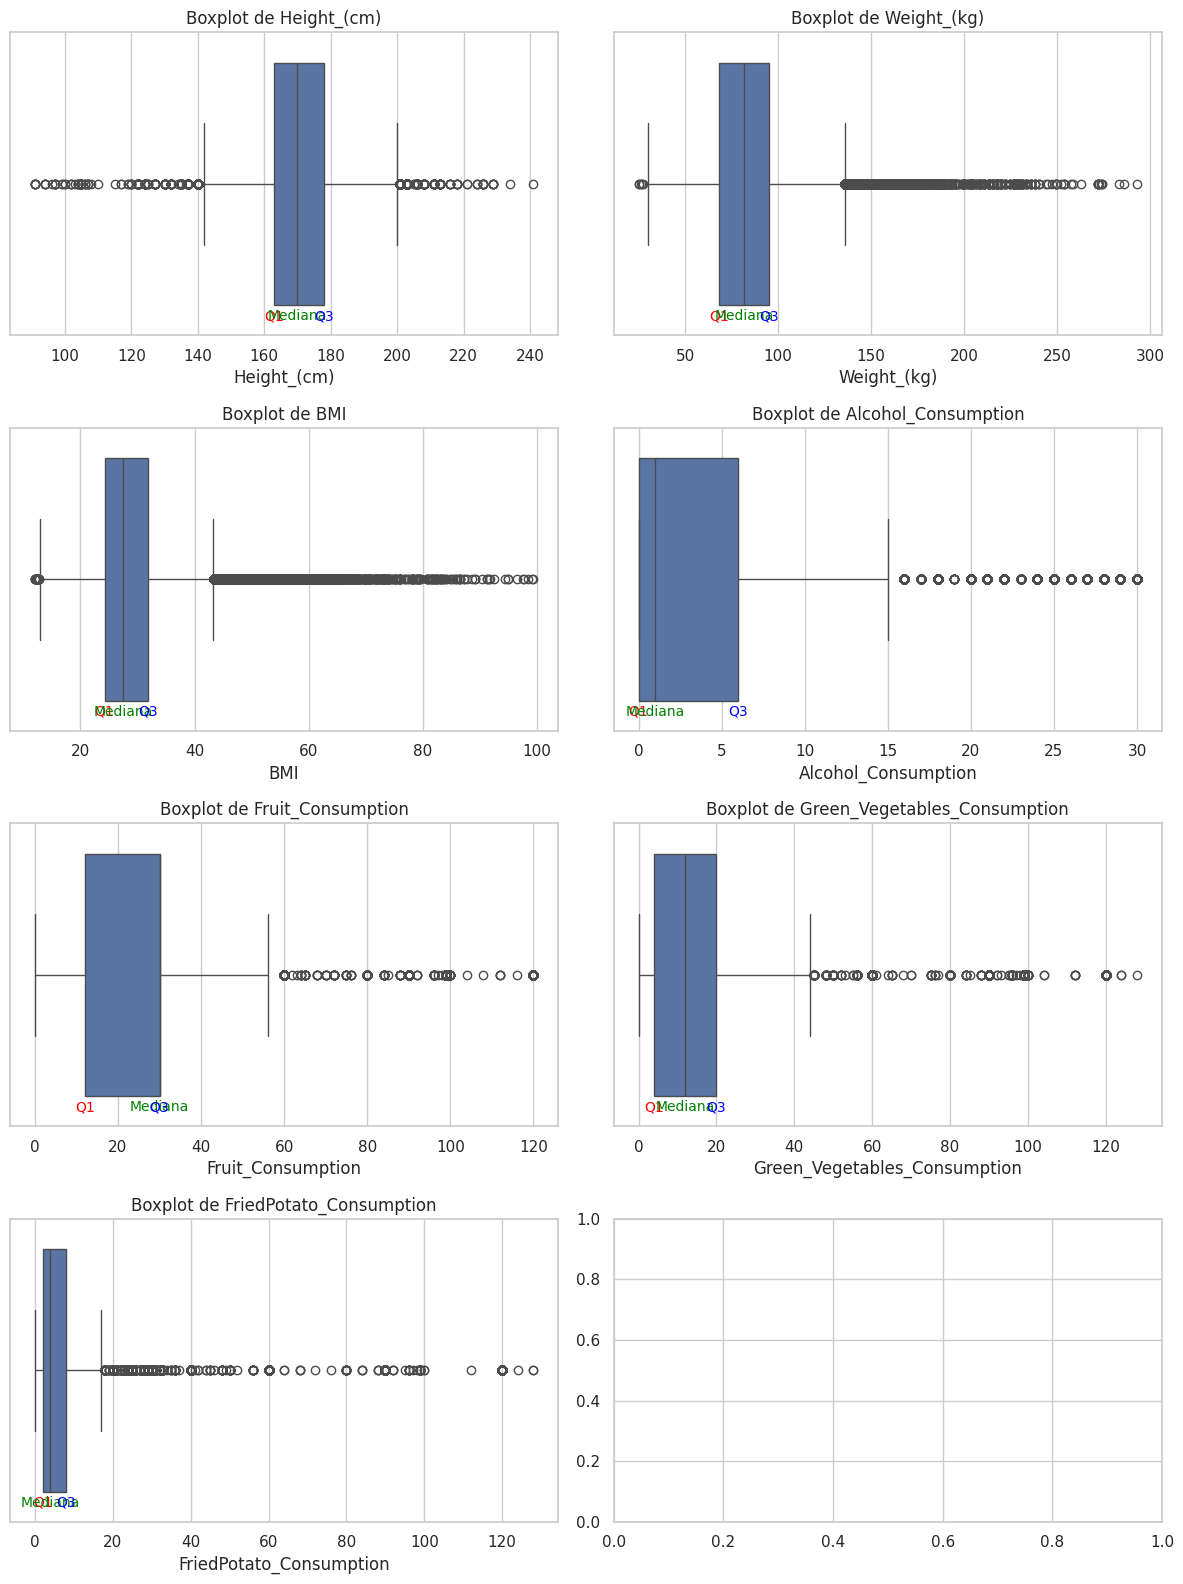

In [ ]:
# Definir la cantidad de filas y columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 filas, 2 columnas
axes = axes.flatten()  # Asegura que podemos iterar sobre los ejes fácilmente

# Generar los boxplots
for i, col in enumerate(num_columns):
    if i < len(axes):  # Evita errores si hay más variables que espacios en la cuadrícula
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}', fontsize=12)

        # Extraer estadísticas del boxplot
        q1 = np.percentile(data[col].dropna(), 25)  # Primer cuartil
        q2 = np.percentile(data[col].dropna(), 50)  # Mediana
        q3 = np.percentile(data[col].dropna(), 75)  # Tercer cuartil

        # Obtener la posición vertical adecuada para las etiquetas
        y_min, y_max = axes[i].get_ylim()
        y_text = y_min + (y_max - y_min) * 0.05  # Posición ajustada en el eje Y

        # Agregar etiquetas de texto en los cuartiles dentro del eje correspondiente
        axes[i].text(q1, y_text, "Q1", horizontalalignment='center', color='red', fontsize=10)
        axes[i].text(q2, y_text, "Mediana", horizontalalignment='center', color='green', fontsize=10)
        axes[i].text(q3, y_text, "Q3", horizontalalignment='center', color='blue', fontsize=10)

# Ajustar el layout para mejor visibilidad
plt.tight_layout()
plt.show()

**Consumo de Alimentos y Bebidas:**

Los outliers en las variables de consumo de alimentos y bebidas tienden a ubicarse en el extremo derecho, lo que indica la presencia de individuos con hábitos de consumo significativamente elevados. Esto podría reflejar diferencias en la dieta, lo que a su vez podría estar relacionado con las variaciones observadas en peso y BMI.


* **Alcohol Consumption**: El boxplot muestra una distribución sesgada hacia la derecha, con outliers en el extremo superior, lo que indica que algunas personas consumen cantidades de alcohol muy elevadas en comparación con el resto de la población. Sin embargo, la mayoría de los individuos presentan un consumo bajo o moderado, ya que los valores están concentrados en los cuartiles inferiores. Además, Q1 está más cerca de la mediana que Q3, lo que refuerza la idea de que los valores más altos son menos frecuentes pero significativamente extremos.

* **Fruit, Green Vegetables y Fried Potato Consumption**:
LLas distribuciones de consumo de frutas, verduras y papas fritas presentan outliers en el extremo derecho, lo que sugiere que algunas personas tienen un consumo extremadamente alto de estos alimentos. Sin embargo, la dispersión varía según el tipo de alimento. En el caso de Fruit Consumption, la caja es más amplia, indicando mayor variabilidad en el consumo. En cambio, en Green Vegetables y Fried Potato Consumption, la caja es más estrecha, lo que sugiere que la mayoría de los valores están más concentrados alrededor de la mediana, con menos variabilidad.

**Conclusion**
1. Sesgo en las variables:

 Distribución: Se observa que varias variables presentan un desequilibrio en la distribución de datos, lo que podría generar sesgos en la modelación y afectar la precisión del análisis. Ejemplos claros son Skin_Cancer, Other_Cancer, Depression, Exercise y Checkup, donde la mayoría de los registros se inclinan hacia una de las categorías (generalmente "No" o respuestas favorables). Esto podría influir en el desempeño del modelo predictivo, haciéndolo más propenso a clasificar erróneamente ciertos casos.

 Outliers: Las variables analizadas presentan valores atípicos significativos, especialmente en el extremo derecho, lo que indica que algunos individuos tienen características físicas o hábitos de consumo extremos. Sin embargo, hay diferencias en la forma en que se distribuyen los datos:

 * La altura tiene outliers en ambos extremos, pero con una mayor concentración en valores bajos.
 * El peso y el BMI están sesgados hacia la derecha, con una mayor dispersión en valores altos.
 * El consumo de alcohol y alimentos presenta outliers altos, pero con variabilidad dependiendo del tipo de alimento analizado.


2. Relevancia de las variables en el análisis del riesgo cardíaco:
Algunas variables tienen una relación más directa con el análisis de enfermedades cardiovasculares, como Sex, Smoking_History, Diabetes, Heart_Disease y Exercise. Factores como el género, el historial de tabaquismo, la presencia de diabetes y la actividad física pueden influir significativamente en el riesgo de desarrollar enfermedades cardíacas.

3. Edad como factor clave en la modelización
La variable Age_Category es altamente representativa en la evaluación del riesgo cardíaco, ya que el envejecimiento está asociado con un mayor riesgo de enfermedades crónicas. Su distribución equilibrada dentro del dataset permite una mejor modelización sin un sesgo significativo.

4. Variables con menor relevancia específica
Aunque variables como General_Health y Checkup pueden aportar información general sobre el bienestar de los encuestados, no proporcionan datos específicos sobre factores de riesgo cardiovascular. Sin embargo, pueden servir como indicadores indirectos de la presencia de problemas de salud no diagnosticados.

5. Importancia del preprocesamiento de datos
Dado el desequilibrio en las distribuciones de varias variables, es recomendable aplicar técnicas de balanceo de datos (como sobremuestreo o submuestreo) para reducir el sesgo y mejorar la capacidad predictiva del modelo. También se deben considerar estrategias como la normalización y transformación de variables para mejorar la precisión del análisis.

